In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Investigation

In [9]:
df = pd.read_csv("tennis_stats.csv")
print(df.head())


                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Player                      1721 non-null   object 
 1   Year                        1721 non-null   int64  
 2   FirstServe                  1721 non-null   float64
 3   FirstServePointsWon         1721 non-null   float64
 4   FirstServeReturnPointsWon   1721 non-null   float64
 5   SecondServePointsWon        1721 non-null   float64
 6   SecondServeReturnPointsWon  1721 non-null   float64
 7   Aces                        1721 non-null   int64  
 8   BreakPointsConverted        1721 non-null   float64
 9   BreakPointsFaced            1721 non-null   int64  
 10  BreakPointsOpportunities    1721 non-null   int64  
 11  BreakPointsSaved            1721 non-null   float64
 12  DoubleFaults                1721 non-null   int64  
 13  ReturnGamesPlayed           1721 

## Exploratory Analysis

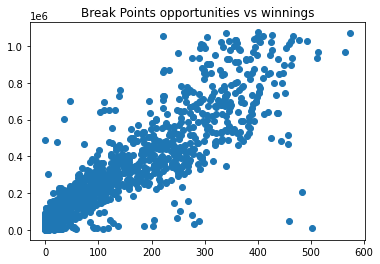

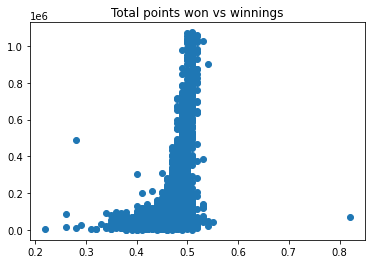

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(df.BreakPointsOpportunities,df.Winnings)
plt.title('Break Points opportunities vs winnings')
plt.show()
plt.clf()

plt.scatter(df.TotalPointsWon,df.Winnings)
plt.title("Total points won vs winnings")
plt.show()
plt.clf()

## Single Feature Linear Regressions

BreakPointsOpportunities vs Winnings 
0.8128248819357747


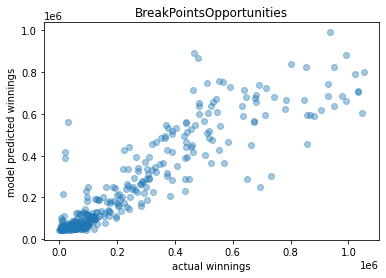

BreakPointsConverted vs Winnings 
0.004567801835748009


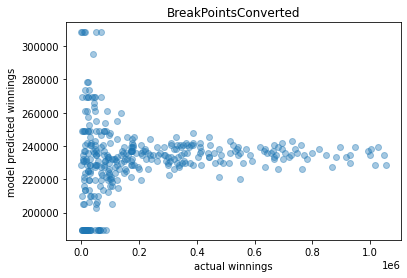

FirstServe vs Winnings 
0.0019204951491332833


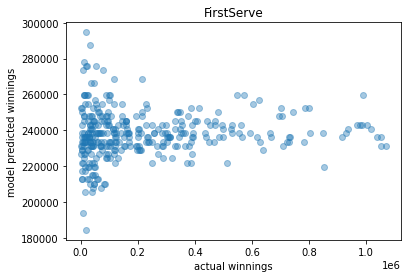

FirstServePointsWon vs Winnings 
0.11071115218130001


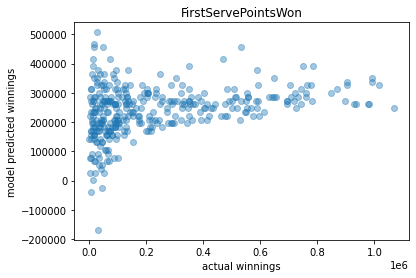

FirstServeReturnPointsWon vs Winnings 
0.08332718379945747


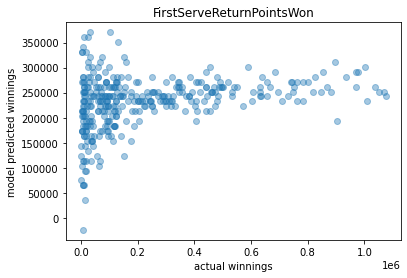

SecondServePointsWon vs Winnings 
0.10051194304346134


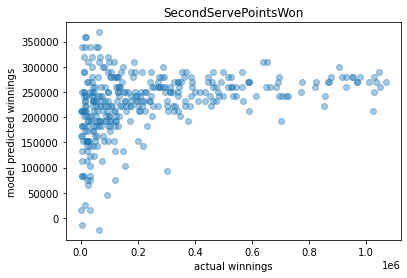

SecondServeReturnPointsWon vs Winnings 
0.04198430400828812


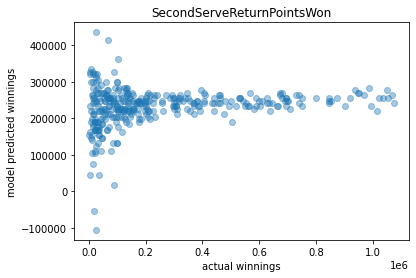

Ranking vs Winnings 
0.17183027866027922


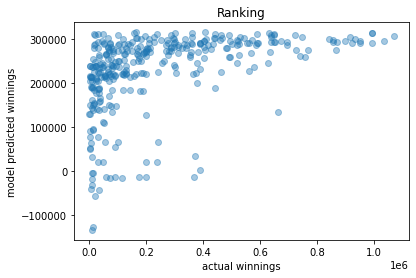

Wins vs Winnings 
0.8277526773977576


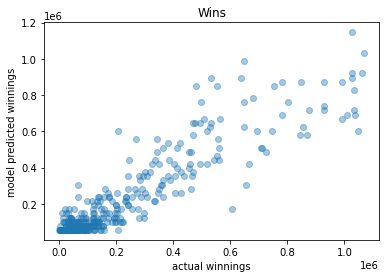

Losses vs Winnings 
0.7445231413334924


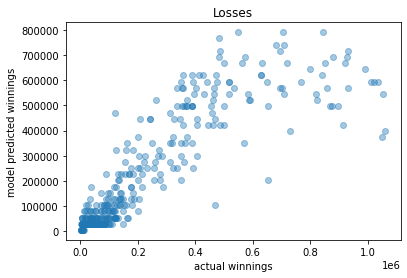

In [21]:
y = df.Winnings
x_list = [df.BreakPointsOpportunities,df.BreakPointsConverted,df.FirstServe,df.FirstServePointsWon,df.FirstServeReturnPointsWon, df.SecondServePointsWon, df.SecondServeReturnPointsWon, df.Ranking, df.Wins, df.Losses]

for x in x_list:

    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)

    model = LinearRegression()

    model.fit(np.array(x_train).reshape(-1,1),y_train)

    print(f"{x.name} vs Winnings ")
    print(model.score(np.array(x_test).reshape(-1,1),y_test))

    y_predict = model.predict(np.array(x_test).reshape(-1,1))

    plt.scatter(y_test,y_predict,alpha=0.4)
    plt.xlabel("actual winnings")
    plt.ylabel("model predicted winnings")
    plt.title(x.name)
    plt.show()
    plt.clf

## Two feature linear regression

BreakPointsOpportunities and Wins vs Winnings 
0.7985001806830572


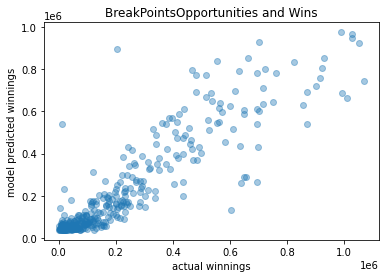

<function matplotlib.pyplot.clf()>

In [22]:
x = df[['BreakPointsOpportunities','Wins']]
y = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)
model = LinearRegression()

model.fit(x_train,y_train)
print(f"BreakPointsOpportunities and Wins vs Winnings ")
print(model.score(x_test,y_test))
y_predict = model.predict(x_test)
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("actual winnings")
plt.ylabel("model predicted winnings")
plt.title('BreakPointsOpportunities and Wins')
plt.show()
plt.clf

## Three feature linear regression model

BreakPointsOpportunities Wins and Losses vs Winnings 
0.8706991636699286


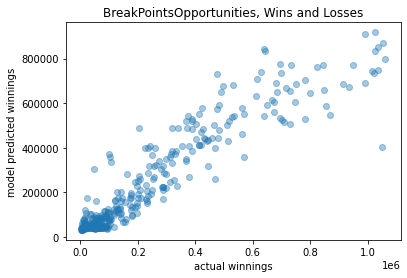

<function matplotlib.pyplot.clf()>

In [23]:
x = df[['BreakPointsOpportunities','Wins','Losses']]
y = df['Winnings']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2)
model = LinearRegression()

model.fit(x_train,y_train)
print(f"BreakPointsOpportunities Wins and Losses vs Winnings ")
print(model.score(x_test,y_test))
y_predict = model.predict(x_test)
plt.scatter(y_test,y_predict,alpha=0.4)
plt.xlabel("actual winnings")
plt.ylabel("model predicted winnings")
plt.title('BreakPointsOpportunities, Wins and Losses')
plt.show()
plt.clf